In [2]:
from utils import Dataset ,perceptron
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
def plot1(inputs,weights):
    sns.scatterplot(data=inputs,x="X",y="Y",hue='Labels',s=2).set(title='plot with decision boundary')
    inputs=np.array(inputs)
    Ya_nn=[]
    ia_nn=[]
    for i in np.linspace(np.amin(inputs[:,:1]),np.amax(inputs[:,:1])):
    
            slope = -(weights[1])/(weights[2])  
            intercept = -(weights[0]/weights[2])
            #y =mx+c, m is slope and c is intercept
            y = (slope*i) + intercept
            ia_nn.append(i)
            Ya_nn.append(y)
    sns.lineplot(x=ia_nn,y=Ya_nn,color='black',markersize=4)
    plt.legend()
    plt.show()

In [4]:
def plot2(inputs,weights):
    print('All the points on/above the decision boundary belongs to class 1')
    sns.scatterplot(data=inputs,x="x1",y="x2",hue='out').set(title='plot with decision boundary')
    inputs=np.array(inputs)
    Ya_nn=[]
    ia_nn=[]
    for i in np.linspace(np.amin(inputs[:,:1]),np.amax(inputs[:,:1])):
            slope = 0
            intercept =0 
            if(weights[2]!=0):
                slope = -(weights[1])/(weights[2])
            if(weights[2]!=0):
                intercept = -(weights[0]/weights[2])  
            #y =mx+c, m is slope and c is intercept
            y = (slope*i) + intercept
            ia_nn.append(i)
            Ya_nn.append(y)
    sns.lineplot(x=ia_nn,y=Ya_nn,color='black',markersize=4)
    plt.legend()
    plt.show()

### Part 1

In [5]:
#without noise 10,000 samples
d=Dataset(10_000)
df=d.get()
df

,X,Y,Labels
0,0.898230,-0.439526,0
1,0.723509,2.309685,1
2,-0.822943,-0.568124,0
3,-0.281687,3.959506,1
4,0.281912,0.959440,0
...,...,...,...
9995,0.867456,2.502486,1
9996,0.992129,3.125221,1
9997,-0.242525,0.970145,0
9998,0.135728,2.009254,1


In [6]:
# d=Dataset(10000) with noise added
df1=d.get(True)
df1

,X,Y,Labels
0,0.561958,2.377508,1
1,-0.524846,0.868321,0
2,0.392301,0.718524,0
3,-0.027525,-1.074236,0
4,-0.127290,4.008247,1
...,...,...,...
9995,-0.457150,2.153987,1
9996,0.682129,3.870551,1
9997,-0.304008,-0.910514,0
9998,0.723689,-0.757239,0


In [7]:
df.shape

(10000, 3)

In [8]:
df1.shape

(10000, 3)

### Part 2

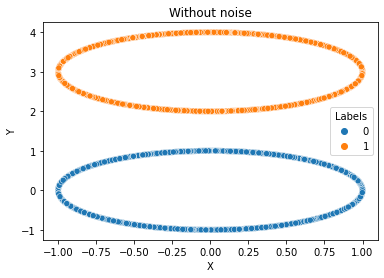

In [9]:

sns.scatterplot(data=df,x="X",y="Y",hue='Labels').set(title='Without noise')
plt.show()

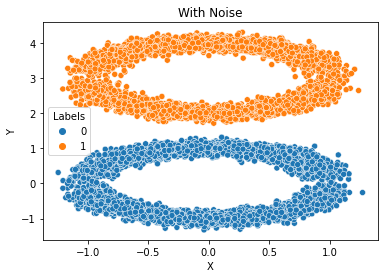

In [10]:
sns.scatterplot(data=df1,x="X",y="Y",hue='Labels').set(title='With Noise')
plt.show()

### Part 3

In [11]:
p=perceptron()
# trainning the perceptron with learnable bias on without noise data
p.train_weights(np.array(df),5,1)

>epoch=0, error=6.000 [-4.0, 0.720376711074459, 2.228126731090508]
>epoch=1, error=0.000 [-4.0, 0.720376711074459, 2.228126731090508]
>epoch=2, error=0.000 [-4.0, 0.720376711074459, 2.228126731090508]
>epoch=3, error=0.000 [-4.0, 0.720376711074459, 2.228126731090508]
>epoch=4, error=0.000 [-4.0, 0.720376711074459, 2.228126731090508]


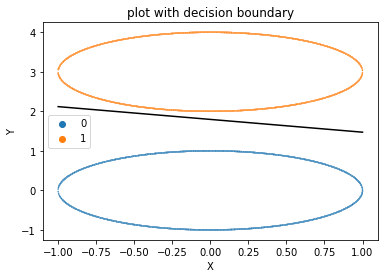

In [12]:
plot1(df,p.weights)

In [13]:
p1=perceptron()
# the third parameter is a flag to make bias 0 or learnable
p1.train_weights(np.array(df1),5,1)

>epoch=0, error=13.000 [-5.0, -0.08963611587720852, 3.0705765156008695]
>epoch=1, error=0.000 [-5.0, -0.08963611587720852, 3.0705765156008695]
>epoch=2, error=0.000 [-5.0, -0.08963611587720852, 3.0705765156008695]
>epoch=3, error=0.000 [-5.0, -0.08963611587720852, 3.0705765156008695]
>epoch=4, error=0.000 [-5.0, -0.08963611587720852, 3.0705765156008695]


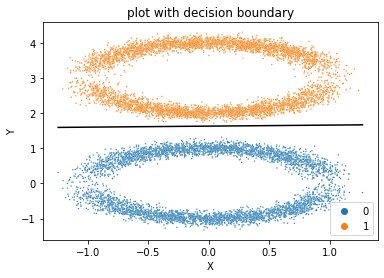

In [14]:
plot1(df1,p1.weights)

The Decision boundary for both the datasets with and without noise exist because the data was linearly separable even after adding noise.
### Part 4

In [15]:
#classifier with bias set to constant 0 and data used = without noise data
p3=perceptron()
p3.train_weights(np.array(df),100,0)

>epoch=0, error=2966.000 [0.0, 0.7298420020772367, 0.357438305509001]
>epoch=1, error=2960.000 [0.0, 0.5832358101376358, 0.35825602366765097]
>epoch=2, error=2933.000 [0.0, 0.2057844099432271, 0.7686138975407416]
>epoch=3, error=2960.000 [0.0, 0.16148262079835995, 0.729842004188166]
>epoch=4, error=2969.000 [0.0, 0.5219670291163601, 0.33676161506953906]
>epoch=5, error=2986.000 [0.0, 0.4717218654541335, 0.704404884716293]
>epoch=6, error=2980.000 [0.0, 1.079825032968965, 0.9073725933009041]
>epoch=7, error=2976.000 [0.0, 0.2209896263871578, 0.7191236710494185]
>epoch=8, error=2969.000 [0.0, 0.43954112055514294, 0.3400822539368865]
>epoch=9, error=2962.000 [0.0, 1.015208100299604, 1.8071932011940732]
>epoch=10, error=3019.000 [0.0, 0.27536465020939405, 0.7640282261868007]
>epoch=11, error=2982.000 [0.0, 1.0515376689089853, 0.8808230634647499]
>epoch=12, error=2973.000 [0.0, 0.5526712300032313, 0.3441118716194903]
>epoch=13, error=2976.000 [0.0, 1.0479557213482988, 1.7845564166478538]
>e

<h6>The decision boundary for this model won't exist because when we made the bias 0 we are forcing the decision boundry to pass through the origin and also separate the data , but the point (0,0) is the center for the circle having k=0 (label = 0)  which makes the weights oscillate to the error value no matter the number of epochs.which results in a non existent decision boundary which passes through (0,0)</h6>
<h6><p>However this is not the case when we allow the bias to be learnable (can update with error) it can shift with the weights accordingly to finally converge to a proper decision boundary.</h6><h6>When bias was learnable it took only 2 epochs to find the correct weights but when we fix the bias the error is not reducing even after 100 epochs hence the perceptron will not converge if the bias is set to 0 for the given dataset
<h6>The plots can be seen below for both the cases.


Forcing the boundary line to pass through origin


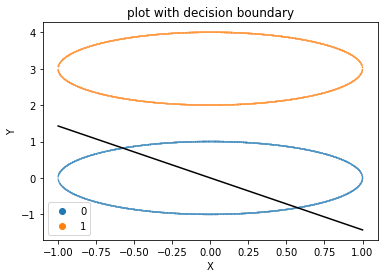

Bias can be adjusted with no restriction


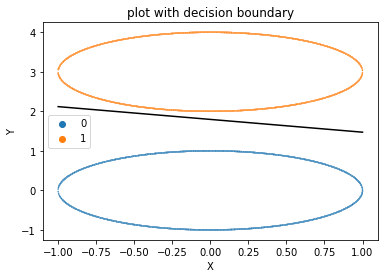

In [16]:
print('Forcing the boundary line to pass through origin')
plot1(df,p3.weights)
print('Bias can be adjusted with no restriction')
plot1(df,p.weights)

### Part 5


In [17]:
xor_d={'x1':[0,0,1,1],'x2':[0,1,0,1],'out':[0,1,1,0]}
and_d={'x1':[0,0,1,1],'x2':[0,1,0,1],'out':[0,0,0,1]}
or_d={'x1':[0,0,1,1],'x2':[0,1,0,1],'out':[0,1,1,1]}


   x1  x2  out
0   0   0    0
1   0   1    0
2   1   0    0
3   1   1    1
>epoch=0, error=3.000 [-1.0, 2.0, 1.0]
>epoch=1, error=3.000 [-2.0, 2.0, 1.0]
>epoch=2, error=2.000 [-2.0, 2.0, 2.0]
>epoch=3, error=1.000 [-3.0, 2.0, 1.0]
>epoch=4, error=0.000 [-3.0, 2.0, 1.0]
>epoch=5, error=0.000 [-3.0, 2.0, 1.0]
With learnable bias
All the points on/above the decision boundary belongs to class 1


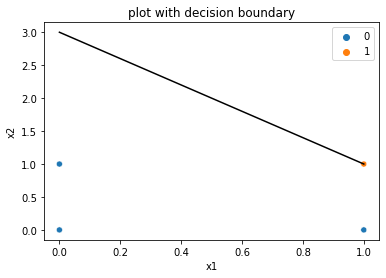

>epoch=0, error=3.000 [0.0, 0.0, 0.0]
>epoch=1, error=4.000 [0.0, 0.0, 0.0]
>epoch=2, error=4.000 [0.0, 0.0, 0.0]
>epoch=3, error=4.000 [0.0, 0.0, 0.0]
>epoch=4, error=4.000 [0.0, 0.0, 0.0]
>epoch=5, error=4.000 [0.0, 0.0, 0.0]
With 0 bias
All the points on/above the decision boundary belongs to class 1


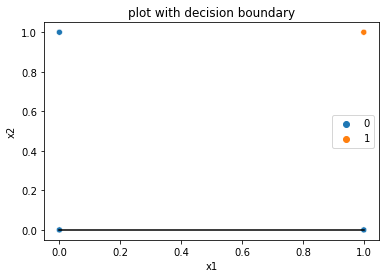

In [18]:
and_df=pd.DataFrame(and_d)
print(and_df)
p_and=perceptron()
p_and.train_weights(np.array(and_df),6,1)
print('With learnable bias')
plot2(and_df,p_and.weights)

p_and1=perceptron()
p_and1.train_weights(np.array(and_df),6,0)
print('With 0 bias')
plot2(and_df,p_and1.weights)

   x1  x2  out
0   0   0    0
1   0   1    1
2   1   0    1
3   1   1    1
>epoch=0, error=1.000 [-1.0, 1.0, 1.0]
>epoch=1, error=0.000 [-1.0, 1.0, 1.0]
>epoch=2, error=0.000 [-1.0, 1.0, 1.0]
>epoch=3, error=0.000 [-1.0, 1.0, 1.0]
>epoch=4, error=0.000 [-1.0, 1.0, 1.0]
>epoch=5, error=0.000 [-1.0, 1.0, 1.0]
All the points on/above the decision boundary belongs to class 1


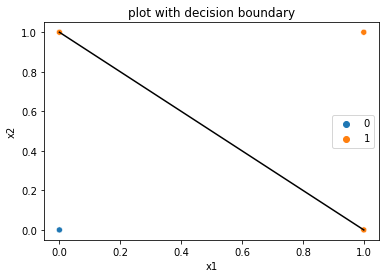

>epoch=0, error=1.000 [0.0, 1.0, 1.0]
>epoch=1, error=1.000 [0.0, 1.0, 1.0]
>epoch=2, error=1.000 [0.0, 1.0, 1.0]
>epoch=3, error=1.000 [0.0, 1.0, 1.0]
>epoch=4, error=1.000 [0.0, 1.0, 1.0]
>epoch=5, error=1.000 [0.0, 1.0, 1.0]
All the points on/above the decision boundary belongs to class 1


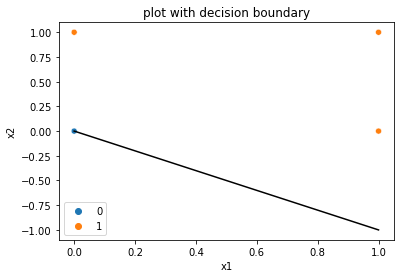

In [20]:
or_df=pd.DataFrame(or_d)
print(or_df)
p_or=perceptron()
#leanable bias
p_or.train_weights(np.array(or_df),6,1)
plot2(or_df,p_or.weights)
p_or1=perceptron()
p_or1.train_weights(np.array(or_df),6,0)
plot2(or_df,p_or1.weights)

   x1  x2  out
0   0   0    0
1   0   1    1
2   1   0    1
3   1   1    0
>epoch=0, error=2.000 [-2.0, 0.0, 0.0]
>epoch=1, error=3.000 [-1.0, 0.0, 0.0]
>epoch=2, error=2.000 [-1.0, -1.0, 0.0]
>epoch=3, error=3.000 [0.0, -1.0, 0.0]
>epoch=4, error=4.000 [0.0, -1.0, 0.0]
All the points on/above the decision boundary belongs to class 1


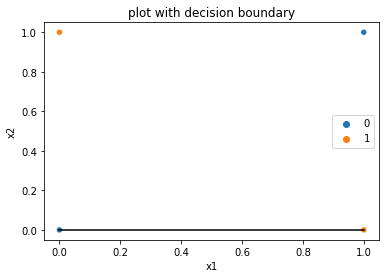

>epoch=0, error=2.000 [0.0, 0.0, 0.0]
>epoch=1, error=2.000 [0.0, -1.0, -1.0]
>epoch=2, error=4.000 [0.0, -1.0, -1.0]
>epoch=3, error=4.000 [0.0, -1.0, -1.0]
>epoch=4, error=4.000 [0.0, -1.0, -1.0]
All the points on/above the decision boundary belongs to class 1


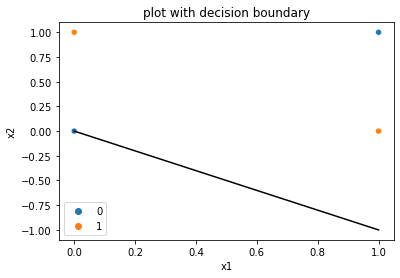

In [21]:
xor_df=pd.DataFrame(xor_d)
print(xor_df)
p_xor=perceptron()
p_xor.train_weights(np.array(xor_df),5,1)
plot2(xor_df,p_xor.weights)
p_xor1=perceptron()
p_xor1.train_weights(np.array(xor_df),5,0)
plot2(xor_df,p_xor1.weights)

Wrong decision boundary for XOR dataset because data can not be separated with one decision boundry

### part 6

Given a hyperplane boundary and a point we can classify the point into<br> class 0 or 1 by putting the point coordinates into the hyperplane equation<br> by applying the sign(signum) function on the result(let's call it R)<br><br>
Assumption :: sign function gives 1 when R is >=0 and 0 when R < 0 <br> <br>
when the sign function gives 1 the class of the point is 1 else the class of the point is 0. 